# 数据分析

赛题：零基础入门数据挖掘 - 零基础入门金融风控之贷款违约

目的：

- 1.EDA价值主要在于熟悉了解整个数据集的基本情况（缺失值，异常值），对数据集进行验证是否可以进行接下来的机器学习或者深度学习建模.

- 2.了解变量间的相互关系、变量与预测值之间的存在关系。

- 3.为特征工程做准备

项目地址：https://github.com/datawhalechina/team-learning-data-mining/tree/master/FinancialRiskControl

比赛地址：https://tianchi.aliyun.com/competition/entrance/531830/introduction

## 内容介绍

- 数据总体了解：
  - 读取数据集并了解数据集大小，原始特征维度；
  - 通过info熟悉数据类型；
  - 粗略查看数据集中各特征基本统计量；
- 缺失值和唯一值：
  - 查看数据缺失值情况
  - 查看唯一值特征情况
- 深入数据-查看数据类型
  - 类别型数据
  - 数值型数据
    - 离散数值型数据
    - 连续数值型数据
- 数据间相关关系
  - 特征和特征之间关系
  - 特征和目标变量之间关系
- 用pandas_profiling生成数据报告

## 导入所需库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

## 数据总体了解

In [2]:
data_train = pd.read_csv('./data/train.csv')
data_test_a = pd.read_csv('./data/testA.csv')

In [3]:
data_test_a.shape

(200000, 48)

In [4]:
data_train.shape

(800000, 47)

In [10]:
data_train.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n2.1', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

In [12]:
data_test_a.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'purpose',
       'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow',
       'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal',
       'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType',
       'earliesCreditLine', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n2.1',
       'n2.2', 'n2.3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12',
       'n13', 'n14'],
      dtype='object')

In [13]:
set(data_train.columns.to_list()) - set(data_test_a.columns.to_list())

{'isDefault'}

测试集比训练集多两列， n2.2  n2.3

In [14]:
set(data_test_a.columns.to_list()) - set(data_train.columns.to_list())

{'n2.2', 'n2.3'}

查看一下具体的列名，赛题理解部分已经给出具体的特征含义，这里方便阅读再给一下：

- id	为贷款清单分配的唯一信用证标识
- loanAmnt	贷款金额
- term	贷款期限（year）
- interestRate	贷款利率
- installment	分期付款金额
- grade	贷款等级
- subGrade	贷款等级之子级
- employmentTitle	就业职称
- employmentLength	就业年限（年）
- homeOwnership	借款人在登记时提供的房屋所有权状况
- annualIncome	年收入
- verificationStatus	验证状态
- issueDate	贷款发放的月份
- purpose	借款人在贷款申请时的贷款用途类别
- postCode	借款人在贷款申请中提供的邮政编码的前3位数字
- regionCode	地区编码
- dti	债务收入比
- delinquency_2years	借款人过去2年信用档案中逾期30天以上的违约事件数
- ficoRangeLow	借款人在贷款发放时的fico所属的下限范围
- ficoRangeHigh	借款人在贷款发放时的fico所属的上限范围
- openAcc	借款人信用档案中未结信用额度的数量
- pubRec	贬损公共记录的数量
- pubRecBankruptcies	公开记录清除的数量
- revolBal	信贷周转余额合计
- revolUtil	循环额度利用率，或借款人使用的相对于所有可用循环信贷的信贷金额
- totalAcc	借款人信用档案中当前的信用额度总数
- initialListStatus	贷款的初始列表状态
- applicationType	表明贷款是个人申请还是与两个共同借款人的联合申请
- earliesCreditLine	借款人最早报告的信用额度开立的月份
- title	借款人提供的贷款名称
- policyCode	公开可用的策略_代码=1新产品不公开可用的策略_代码=2
- n系列匿名特征	匿名特征n0-n14，为一些贷款人行为计数特征的处理

In [15]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [16]:
data_train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252013,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [17]:
data_train.head(3).append(data_train.tail(3))

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
799997,799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,...,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,...,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,799999,9000.0,3,11.06,294.91,B,B3,13.0,5 years,0,...,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


## 查看数据缺失值、唯一值等

In [18]:
print(f'There are {data_train.isnull().any().sum()} columns in train dataset with missing values.')

There are 22 columns in train dataset with missing values.


没有缺失特征中缺失率大于50%的特征

In [22]:
have_null_fea_dict = (data_train.isnull().sum() / len(data_train)).to_dict()
feat_null_moreThanHalf = {}
for key, value in have_null_fea_dict.items():
    if value > 0.5:
        feat_null_moreThanHalf[key] = value

In [24]:
feat_null_moreThanHalf

{}

具体查看确实特征及缺失率

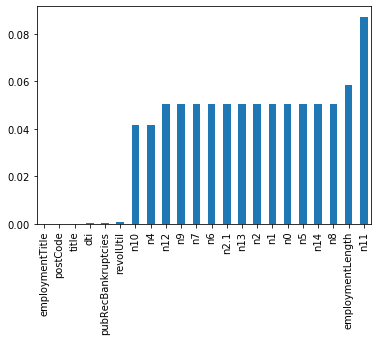

In [26]:
# nan可视化
missing = data_train.isnull().sum()/len(data_train)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

- 纵向了解哪些列存在 “nan”, 并可以把nan的个数打印，主要的目的在于查看某一列nan存在的个数是否真的很大，如果nan存在的过多，说明这一列对label的影响几乎不起作用了，可以考虑删掉。如果缺失值很小一般可以选择填充。
- 另外可以横向比较，如果在数据集中，某些样本数据的大部分列都是缺失的且样本足够的情况下可以考虑删除。

Tips:
比赛大杀器lgb模型可以自动处理缺失值

查看训练集和测试集中特征属性只有一个值的特征

In [27]:
one_value_fea = [col for col in data_train.columns if data_train[col].nunique() <= 1]

In [28]:
one_value_fea_test = [col for col in data_test_a.columns if data_test_a[col].nunique() <= 1]

In [29]:
one_value_fea

['policyCode']

In [30]:
one_value_fea_test

['policyCode']

In [31]:
print(f'There are {len(one_value_fea)} columns in train dataset with one unique value.')
print(f'There are {len(one_value_fea_test)} columns in test dataset with one unique value.')

There are 1 columns in train dataset with one unique value.
There are 1 columns in test dataset with one unique value.


**总结**

47列数据中有22列都缺少数据，这在现实世界中很正常。‘policyCode’具有一个唯一值（或全部缺失）, policyCode 可以删除。有很多连续变量和一些分类变量。

## 查看特征的数值类型

- 特征一般都是由类别型特征和数值型特征组成，而数值型特征又分为连续型和离散型。
- 类别型特征有时具有非数值关系，有时也具有数值关系。比如‘grade’中的等级A，B，C等，是否只是单纯的分类，还是A优于其他要结合业务判断。
- 数值型特征本是可以直接入模的，但往往风控人员要对其做**分箱**，转化为WOE编码进而做标准评分卡等操作。从模型效果上来看，特征分箱主要是为了降低变量的复杂性，**减少变量噪音**对模型的影响，提高自变量和因变量的相关度。从而使模型更加稳定。

In [6]:
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea, list(data_train.columns)))

In [7]:
numerical_fea

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'isDefault',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n2.1',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [36]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

区分连续型和离散型变量

In [9]:
def get_numerical_serial_fea(data, feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 20:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
        
    return numerical_serial_fea, numerical_noserial_fea

numerical_serial_fea, numerical_noserial_fea = get_numerical_serial_fea(data_train, numerical_fea)

In [10]:
numerical_serial_fea

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n2.1',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

In [11]:
numerical_noserial_fea

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'purpose',
 'pubRecBankruptcies',
 'initialListStatus',
 'applicationType',
 'policyCode',
 'n11',
 'n12']

In [47]:
data_train['term'].value_counts()

3    606902
5    193098
Name: term, dtype: int64

In [48]:
data_train['n12'].value_counts()

0.0    757315
1.0      2281
2.0       115
3.0        16
4.0         3
Name: n12, dtype: int64

In [49]:
data_train['n11'].value_counts()#离散型变量，相差悬殊，用不用再分析，是否和 label 相关

0.0    729682
1.0       540
2.0        24
4.0         1
3.0         1
Name: n11, dtype: int64

In [58]:
data_train.groupby(['n11', 'isDefault'])['n11'].count()

n11  isDefault
0.0  0            584274
     1            145408
1.0  0               431
     1               109
2.0  0                22
     1                 2
3.0  1                 1
4.0  0                 1
Name: n11, dtype: int64

In [50]:
data_train['n12'].value_counts()#离散型变量，相差悬殊，用不用再分析

0.0    757315
1.0      2281
2.0       115
3.0        16
4.0         3
Name: n12, dtype: int64

- 数值连续型变量分析

pd.melt 列转行， 把宽数据转为长数据

- frame ： 要操作的DataFrame;
- id_vars : 不需要被转换的列名，其实就是作为主键；
- value_vars：需要转换的列名，如果剩下的列全部都要转换，就不用写了；
- var_name：给varivale那一列的别名。如果没指定或者为None，那么则默认为frame.columns.name 或者varivale
- value_name：给value那一列的别名。默认为value
- col_level：如果列是MultiIndex，则使用此级别。

In [59]:
help(pd.melt)

Help on function melt in module pandas.core.reshape.melt:

melt(frame:'DataFrame', id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index:bool=True) -> 'DataFrame'
    Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    
    Parameters
    ----------
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'variable' column. If None it uses
        ``frame.co

Wall time: 5min 14s


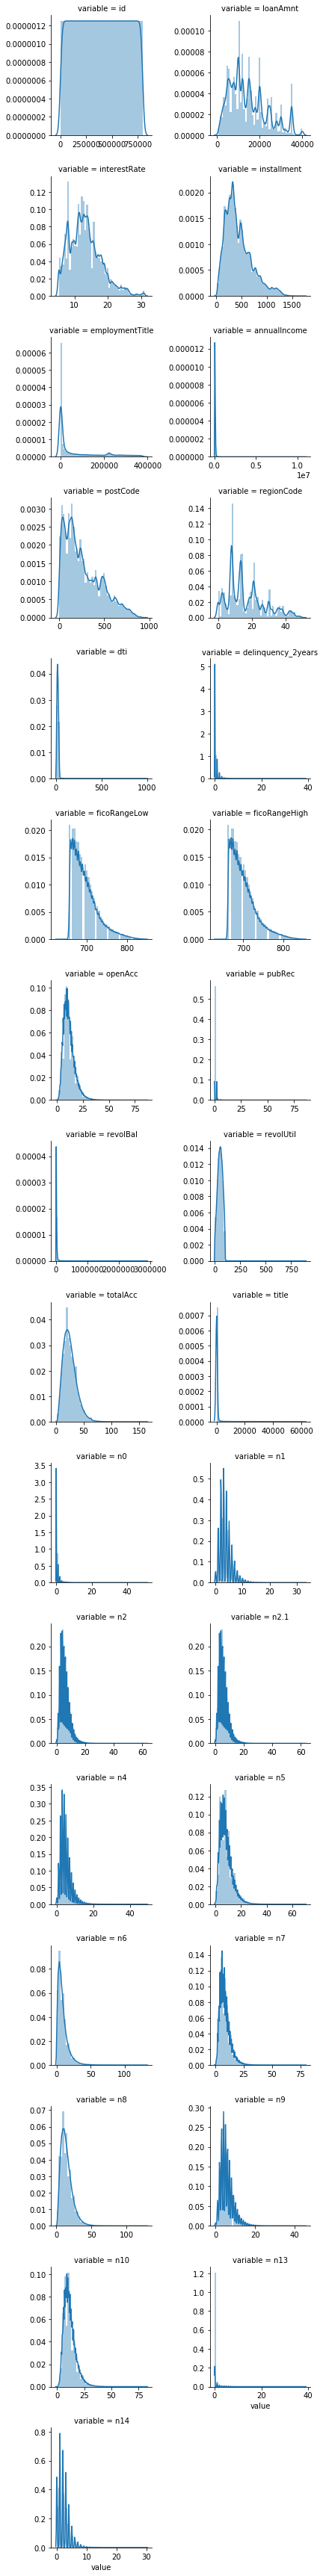

In [12]:
%%time
#每个数字特征得分布可视化
f = pd.melt(data_train, value_vars=numerical_serial_fea)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
# seaborn中的distplot主要功能是绘制单变量的直方图，且还可以在直方图的基础上施加kdeplot和rugplot的部分内容，是一个功能非常强大且实用的函数
g = g.map(sns.distplot, "value")

In [13]:
f.head()

,variable,value
0,id,0.0
1,id,1.0
2,id,2.0
3,id,3.0
4,id,4.0


- 查看某一个数值型变量的分布，查看变量是否符合正态分布，如果不符合正态分布的变量可以log化后再观察下是否符合正态分布。
- 如果想统一处理一批数据变标准化 必须把这些之前已经正态化的数据剔除
- 正态化的原因：一些情况下正态可以让模型更快的收敛，一些模型要求数据正态（eg. GMM、KNN）,保证数据不要过偏态即可，过于偏态可能会影响模型预测结果。

Text(0, 0.5, 'Probability')

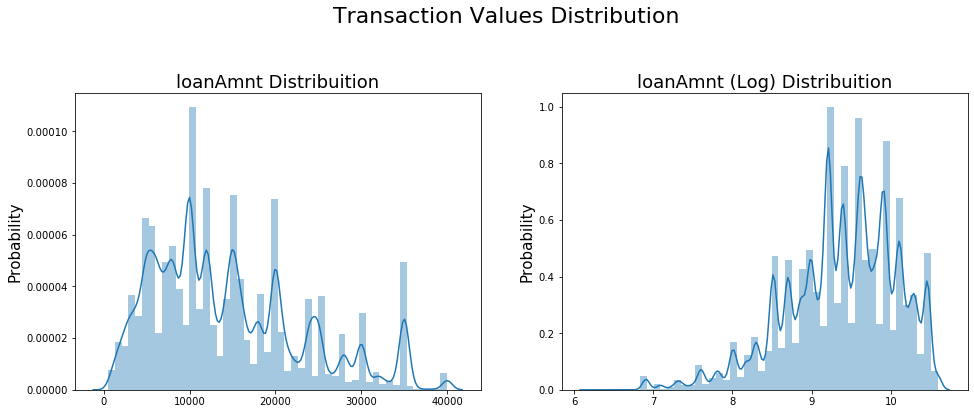

In [63]:
#Ploting Transaction Amount Values Distribution
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Values Distribution', fontsize=22)
plt.subplot(221)
sub_plot_1 = sns.distplot(data_train['loanAmnt'])
sub_plot_1.set_title("loanAmnt Distribuition", fontsize=18)
sub_plot_1.set_xlabel("")
sub_plot_1.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
sub_plot_2 = sns.distplot(np.log(data_train['loanAmnt']))
sub_plot_2.set_title("loanAmnt (Log) Distribuition", fontsize=18)
sub_plot_2.set_xlabel("")
sub_plot_2.set_ylabel("Probability", fontsize=15)

In [64]:
data_train['grade'].value_counts()

B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: grade, dtype: int64

**总结：**

- 上面我们用value_counts()等函数看了特征属性的分布，但是图表是概括原始信息最便捷的方式。
- 同一份数据集，在不同的尺度刻画上显示出来的图形反映的规律是不一样的。python将数据转化成图表，但结论是否正确需要由你保证。

## 变量分布可视化

### 单一变量分布可视化

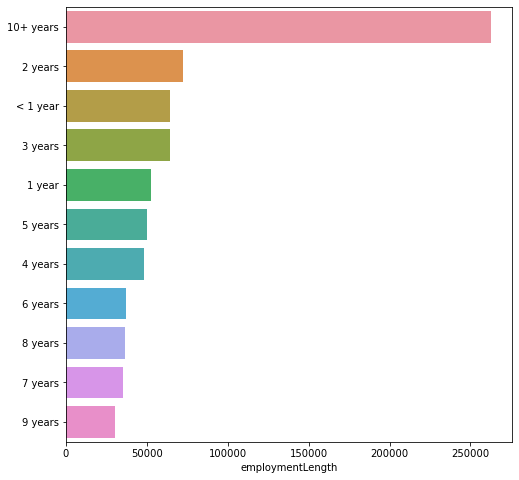

In [15]:
plt.figure(figsize=(8,8))
sns.barplot(data_train["employmentLength"].value_counts(dropna=False)[:20], data_train["employmentLength"].value_counts(dropna=False).keys()[:20])
plt.show()

### 根据y值不同，可视化某个特征的分布

In [16]:
train_loan_fr = data_train.loc[data_train['isDefault'] == 1]
train_loan_nofr = data_train.loc[data_train['isDefault'] == 0]

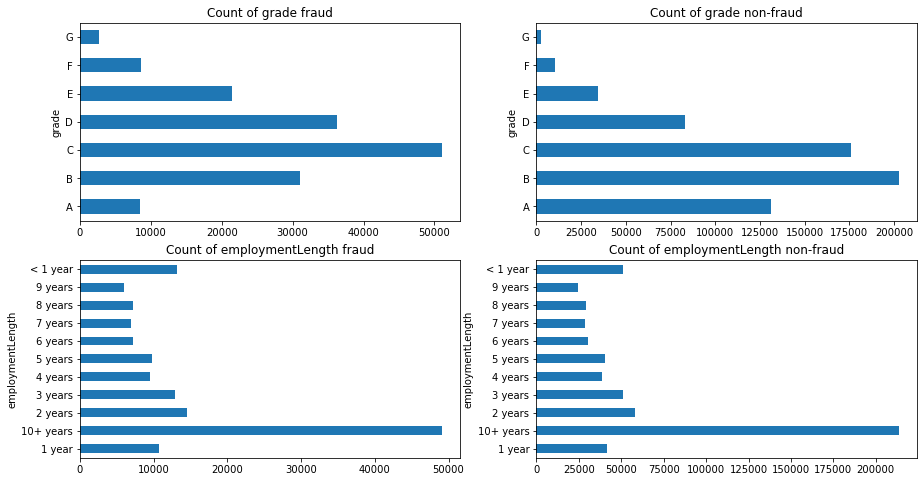

In [17]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(15,8))
train_loan_fr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax1, title='Count of grade fraud')
train_loan_nofr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax2, title='Count of grade non-fraud')
train_loan_fr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax3, title='Count of employmentLength fraud')
train_loan_nofr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax4, title='Count of employmentLength non-fraud')
plt.show()

其次查看连续型变量在不同y值上的分布

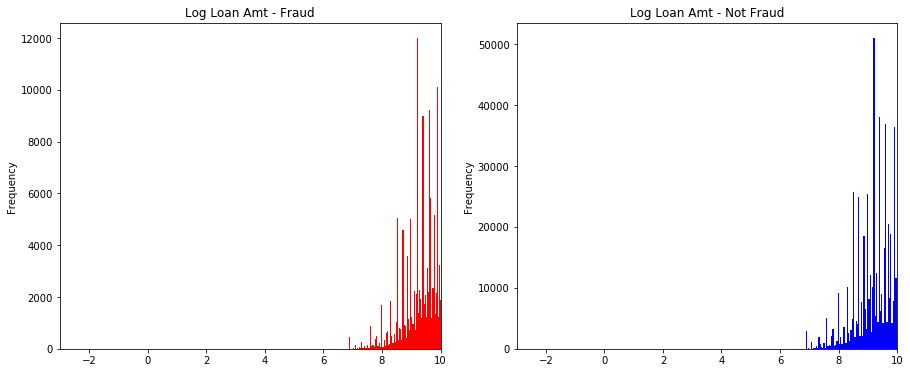

In [18]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6))
data_train.loc[data_train['isDefault'] == 1] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Fraud',
          color='r',
          xlim=(-3, 10),
         ax= ax1)
data_train.loc[data_train['isDefault'] == 0] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Not Fraud',
          color='b',
          xlim=(-3, 10),
         ax=ax2)

In [23]:
data_train['loanAmnt'].sum()

11533455100.0

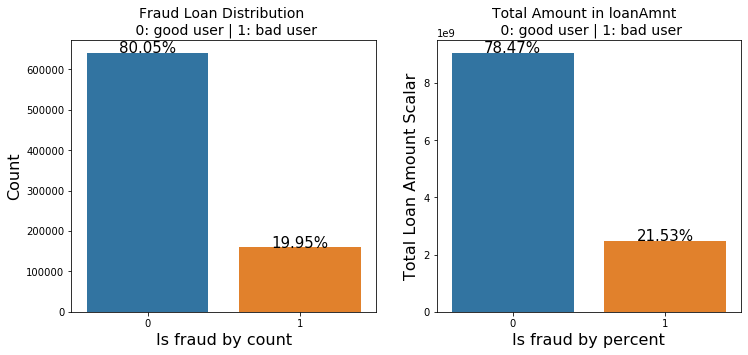

In [24]:
total = len(data_train)
total_amt = data_train['loanAmnt'].sum()
plt.figure(figsize=(12,5))
plt.subplot(121)##1代表行，2代表列，所以一共有2个图，1代表此时绘制第一个图。
# 是否违约的人数比例
plot_tr = sns.countplot(x='isDefault',data=data_train)#data_train‘isDefault’这个特征每种类别的数量**
plot_tr.set_title("Fraud Loan Distribution \n 0: good user | 1: bad user", fontsize=14)
plot_tr.set_xlabel("Is fraud by count", fontsize=16)
plot_tr.set_ylabel('Count', fontsize=16)
for p in plot_tr.patches:
    height = p.get_height()
    plot_tr.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
    
# 是否违约，贷款金额占比
percent_amt = (data_train.groupby(['isDefault'])['loanAmnt'].sum())
percent_amt = percent_amt.reset_index()
plt.subplot(122)
plot_tr_2 = sns.barplot(x='isDefault', y='loanAmnt',  dodge=True, data=percent_amt)
plot_tr_2.set_title("Total Amount in loanAmnt  \n 0: good user | 1: bad user", fontsize=14)
plot_tr_2.set_xlabel("Is fraud by percent", fontsize=16)
plot_tr_2.set_ylabel('Total Loan Amount Scalar', fontsize=16)
for p in plot_tr_2.patches:
    height = p.get_height()
    plot_tr_2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_amt * 100),
            ha="center", fontsize=15)     

## 时间格式数据处理查看

In [25]:
data_train['issueDate'].min()

'2007-06-01'

In [26]:
#转化成时间格式  issueDateDT特征表示数据日期离数据集中日期最早的日期（2007-06-01）的天数
data_train['issueDate'] = pd.to_datetime(data_train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
data_train['issueDateDT'] = data_train['issueDate'].apply(lambda x: x-startdate).dt.days

In [27]:
data_train[['issueDate', 'issueDateDT']].head()

,issueDate,issueDateDT
0,2014-07-01,2587
1,2012-08-01,1888
2,2015-10-01,3044
3,2015-08-01,2983
4,2016-03-01,3196


In [28]:
#转化成时间格式
data_test_a['issueDate'] = pd.to_datetime(data_train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
data_test_a['issueDateDT'] = data_test_a['issueDate'].apply(lambda x: x-startdate).dt.days

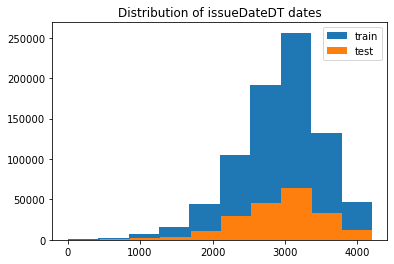

In [30]:
plt.hist(data_train['issueDateDT'], label='train');
plt.hist(data_test_a['issueDateDT'], label='test');
plt.legend()
plt.title('Distribution of issueDateDT dates');
#train 和 test issueDateDT 日期有重叠 所以使用基于时间的分割进行验证是不明智的

## 掌握透视图可以让我们更好的了解数据

In [31]:
#透视图 索引可以有多个，“columns（列）”是可选的，聚合函数aggfunc最后是被应用到了变量“values”中你所列举的项目上。
pivot = pd.pivot_table(data_train, index=['grade'], columns=['issueDateDT'], values=['loanAmnt'], aggfunc=np.sum)

In [32]:
pivot

loanAmnt                                                         \
issueDateDT     0        30       61       92       122      153       183    
grade                                                                         
A                NaN  53650.0  42000.0  19500.0  34425.0  63950.0   43500.0   
B                NaN  13000.0  24000.0  32125.0   7025.0  95750.0  164300.0   
C                NaN  68750.0   8175.0  10000.0  61800.0  52550.0  175375.0   
D                NaN      NaN   5500.0   2850.0  28625.0      NaN  167975.0   
E             7500.0      NaN  10000.0      NaN  17975.0   1500.0   94375.0   
F                NaN      NaN  31250.0   2125.0      NaN      NaN       NaN   
G                NaN      NaN      NaN      NaN      NaN      NaN       NaN   

                                           ...                          \
issueDateDT      214       245       274   ...        3926        3957   
grade                                      ...                           
A            168825.0   85600.0  101825.0  ...  13093850.0  11757325.0   
B            303175.0  434425.0  538450.0  ...  16863100.0  17275175.0   
C            151100.0  243725.0  393150.0  ...  17502375.0  17471500.0   
D            171325.0  192900.0  269325.0  ...  11403075.0  10964150.0   
E            116450.0   42000.0  139775.0  ...   3983050.0   3410125.0   
F             49000.0   27000.0   43000.0  ...   1074175.0    868925.0   
G             24625.0       NaN       NaN  ...     56100.0    243275.0   

                                                                       \
issueDateDT        3987        4018        4048       4079       4110   
grade                                                                   
A            11945975.0   9144000.0   7977650.0  6888900.0  5109800.0   
B            16217500.0  11431350.0   8967750.0  7572725.0  4884600.0   
C            16111225.0  11973675.0  10184450.0  7765000.0  5354450.0   
D            10747675.0   7082050.0   7189625.0  5195700.0  3455175.0   
E             3107150.0   2341825.0   2225675.0  1643675.0  1091025.0   
F              761675.0    685325.0    665750.0   685200.0   316700.0   
G              224825.0     64050.0    198575.0   245825.0    53125.0   

                                              
issueDateDT       4140       4171       4201  
grade                                         
A            3919275.0  2694025.0  2245625.0  
B            4329400.0  3922575.0  3257100.0  
C            4552600.0  2870050.0  2246250.0  
D            3038500.0  2452375.0  1771750.0  
E            1131625.0   883950.0   802425.0  
F             315075.0    72300.0        NaN  
G              23750.0    25100.0     1000.0  

[7 rows x 139 columns]

In [33]:
data_train.groupby(['grade', 'issueDateDT'])['loanAmnt'].sum()

grade  issueDateDT
A      30              53650.0
       61              42000.0
       92              19500.0
       122             34425.0
       153             63950.0
                        ...   
G      4079           245825.0
       4110            53125.0
       4140            23750.0
       4171            25100.0
       4201             1000.0
Name: loanAmnt, Length: 926, dtype: float64

## 用pandas_profiling生成数据报告

In [4]:
import pandas_profiling
pfr = pandas_profiling.ProfileReport(data_train)
pfr.to_file("./example.html")

Export report to file: 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


## 总结
数据探索性分析是我们初步了解数据，熟悉数据为特征工程做准备的阶段，甚至很多时候EDA阶段提取出来的特征可以直接当作规则来用。可见EDA的重要性，这个阶段的主要工作还是借助于各个简单的统计量来对数据整体的了解，分析各个类型变量相互之间的关系，以及用合适的图形可视化出来直观观察。